# Package: SCIKIT-LEARN

Imports

In [80]:
import sys
sys.setrecursionlimit(5000) # no RecursionError: maximum recursion depth exceeded
import pandas as pd
from sklearn.model_selection import train_test_split
#__SOCATHIC GRADIENT DESCENT___#
from sklearn.linear_model import SGDClassifier 
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from imblearn.combine import SMOTEENN
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Reading the data

In [8]:
#Colums for CSV data
colums = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv('Data/Diabetes.csv',names=colums)

#First 5 test
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data looks good, clean, no null values

Now train test split

In [9]:
X = df.drop(columns=['Outcome']) #This is what we are trying to predict
Y = df['Outcome'] #What we are predicting

# 80/20 training split for the Model
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(f"Training Data Shape: {X_Train.shape}")
print(f"Testing Data Shape: {X_Test.shape}")

Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)


Pefect 80/20 split. 8 Features as usual.

Logistic regression since outcome is binary (1 or 0) 

# Using Stochastic Gradient Descent 
​


In [10]:
#_______REDACTED____________#
#Get another model#

#Data augment using SMOTE
# Standardize the features (important for gradient descent)
scaler = MinMaxScaler()
X_Train_Scaled = scaler.fit_transform(X_Train)
smote_enn = SMOTEENN(random_state=42)
X_Train_Resampled, Y_Train_Resampled = smote_enn.fit_resample(X_Train_Scaled, Y_Train)
X_Test_Scaled = scaler.transform(X_Test)

#SGD itself with
SGD = SGDClassifier(
    penalty='l2', 
    loss='modified_huber', 
    learning_rate='adaptive', 
    eta0=0.01, 
    alpha=0.0001, 
    class_weight='balanced',  # Keep this if you need to handle imbalanced data
    max_iter=1000,
    random_state=42,
    n_iter_no_change=5,
    early_stopping=True
) 
#loss function is log, 1000 standard limit, smallest stepsize 1e-3, 42 is constant noise

#Adding Params(Beta) to the model
SGD.fit(X_Train_Resampled, Y_Train_Resampled)
#Finding best params
param_grid = { 
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'learning_rate': ['constant', 'adaptive'],
    'eta0': [0.001, 0.01],
    'alpha': [0.0001, 0.001],
    'penalty': ['l2', 'l1'],
}
RandomizedSearchCV_search = RandomizedSearchCV(SGD, param_grid, n_iter=50, cv=3, scoring='f1', n_jobs=2, random_state=42)
RandomizedSearchCV_search.fit(X_Train_Resampled, Y_Train_Resampled)
print(f"Best parameters: {RandomizedSearchCV_search.best_params_}")
Y_Pred = RandomizedSearchCV_search.best_estimator_.predict(X_Test_Scaled)
print(classification_report(Y_Test, Y_Pred))

#Accuarcy
accuracy = SGD.score(X_Test_Scaled, Y_Test)
print(f"Accuracy: {accuracy * 100: .2f} ")

c:\Users\aditr\OneDrive\Desktop\Coding file\MedRLX\Diabetes\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\aditr\OneDrive\Desktop\Coding file\MedRLX\Diabetes\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'penalty': 'l2', 'loss': 'modified_huber', 'learning_rate': 'adaptive', 'eta0': 0.01, 'alpha': 0.0001}
              precision    recall  f1-score   support

           0       0.85      0.64      0.73        99
           1       0.55      0.80      0.65        55

    accuracy                           0.69       154
   macro avg       0.70      0.72      0.69       154
weighted avg       0.74      0.69      0.70       154

Accuracy:  69.48 


Using a different model

# KNN MODEL 

k-nearest neighbhors

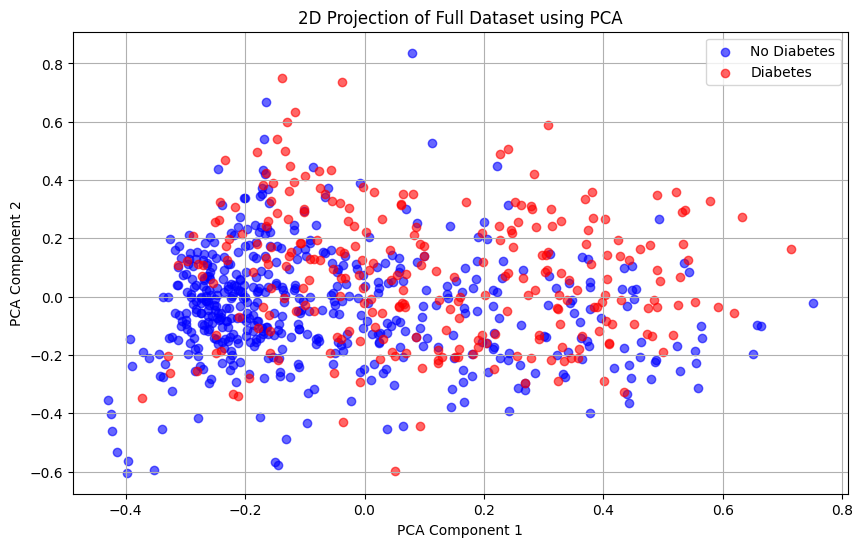

In [11]:
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[Y == 0][:, 0], X_pca[Y == 0][:, 1], color='blue', label='No Diabetes', alpha=0.6)
plt.scatter(X_pca[Y == 1][:, 0], X_pca[Y == 1][:, 1], color='red', label='Diabetes', alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Projection of Full Dataset using PCA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#KNN
def EuclideanDist(p1, p2):
    return np.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))


def KNN(X_train, Y_train, test_point, k=3):
    Distance = []
    for i in range(len(X_train)):
        dist = EuclideanDist(test_point, X_train[i])
        Distance.append((dist, Y_train.iloc[i]))
    Distance.sort(key=lambda x: x[0])
    k_nearest = Distance[:k]
    labels = [label for _,label in k_nearest]
    prediction = max(set(labels), key=labels.count)
    return prediction, k_nearest

test_point = X_Test_Scaled[0]
test_point_Unscaled = X_Test.iloc[0]
prediction, nearestK = KNN(X_Train_Resampled, Y_Train_Resampled ,test_point)


print(f"Predection of \n{test_point_Unscaled} \nis {prediction}")
for dist, label in nearestK:
    print(f"Distance: {dist:.3f}, Label: {label}")


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  
Predection of 
Pregnancies                   6.00
Glucose                      98.00
BloodPressure                58.00
SkinThickness                33.00
Insulin                     190.00
BMI                          34.00
DiabetesPedigreeFunction      0.43
Age                          43.00
Name: 668, dtype: float64 
is 1
Distan

In [110]:
def Score_knn_method(X_test, Y_test, model):
    predictions = []
    for i in range(len(X_test)):
        test_point = X_test[i]
        prediction, _ = model(X_Train_Resampled, Y_Train_Resampled, test_point)
        predictions.append(prediction)
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    cm = confusion_matrix(Y_test, predictions)
    
    print(f"Accuracy: {accuracy*100:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

Score_knn_method(X_Test_Scaled, Y_Test, KNN)


Accuracy: 66.2338
Precision: 0.5176
Recall: 0.8000
F1-Score: 0.6286
Confusion Matrix:
[[58 41]
 [11 44]]
